In [2]:
import numpy as np
import pandas as pd

abalone_data = pd.read_csv('data/abalone.csv', header=None)
abalone_data.head(5)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:

datax = abalone_data.iloc[:, 1:]
datay = abalone_data.iloc[:, 0]

print(datax)
print(datay)

          1      2      3       4       5       6       7   8
0     0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...     ...    ...    ...     ...     ...     ...     ...  ..
4172  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 8 columns]
0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: 0, Length: 4177, dtype: object


In [4]:
np_abalone_data = np.array(abalone_data)

datax = np_abalone_data[:, 1:]
datay = np_abalone_data[:, 0]
print(datax)
print(datay)

[[0.455 0.365 0.095 ... 0.101 0.15 15]
 [0.35 0.265 0.09 ... 0.0485 0.07 7]
 [0.53 0.42 0.135 ... 0.1415 0.21 9]
 ...
 [0.6 0.475 0.205 ... 0.2875 0.308 9]
 [0.625 0.485 0.15 ... 0.261 0.296 10]
 [0.71 0.555 0.195 ... 0.3765 0.495 12]]
['M' 'M' 'F' ... 'M' 'F' 'M']


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)

print(np.min(trnx_scale[:, 0]), np.max(trnx_scale[:, 0]))
print(np.min(tstx_scale[:, 0]), np.max(tstx_scale[:, 0]))

0.0 0.9999999999999999
-0.08208955223880596 1.0223880597014925


In [21]:
# bayesian
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(trnx, trny)
gnb_pred_trn = gnb.predict(trnx)
gnb_pred_tst = gnb.predict(tstx)
print(gnb_pred_trn)
print(gnb_pred_tst)

['M' 'M' 'F' ... 'I' 'I' 'M']
['F' 'I' 'I' ... 'F' 'F' 'M']


In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.accuracy_score(trny, gnb_pred_trn))
print(metrics.accuracy_score(tsty, gnb_pred_tst))
confusion_matrix(tsty, gnb_pred_tst)

0.5295928840232638
0.5318979266347688


array([[202,  83, 110],
       [ 19, 339,  59],
       [207, 109, 126]])

In [23]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(trnx, trny)
knn_pred_trn = knn_model.predict(trnx)
knn_pred_tst = knn_model.predict(tstx)
print(knn_pred_trn)
print(knn_pred_tst)

['M' 'F' 'F' ... 'I' 'I' 'F']
['F' 'F' 'M' ... 'M' 'M' 'M']


In [24]:
print(metrics.accuracy_score(trny, knn_pred_trn))
print(metrics.accuracy_score(tsty, knn_pred_tst))
confusion_matrix(tsty, knn_pred_tst)

0.6804652754019843
0.5350877192982456


array([[173,  56, 166],
       [ 58, 309,  50],
       [160,  93, 189]])

In [33]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split=3)
tree_model.fit(X=trnx, y=trny)
tree_pred_trn = tree_model.predict(X=trnx)
tree_pred_tst = tree_model.predict(X=tstx)
tree_model.feature_importances_

array([0.00852252, 0.        , 0.        , 0.04731712, 0.03649289,
       0.65072744, 0.06548157, 0.19145847])

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot')

[Text(0.5, 0.9, 'X[5] <= 0.145\ngini = 0.664\nsamples = 2923\nvalue = [912, 925, 1086]'),
 Text(0.25, 0.7, 'X[7] <= 8.5\ngini = 0.538\nsamples = 1208\nvalue = [187, 754, 267]'),
 Text(0.125, 0.5, 'X[6] <= 0.128\ngini = 0.376\nsamples = 783\nvalue = [59, 604, 120]'),
 Text(0.0625, 0.3, 'X[5] <= 0.122\ngini = 0.274\nsamples = 569\nvalue = [25, 480, 64]'),
 Text(0.03125, 0.1, 'gini = 0.266\nsamples = 563\nvalue = [25, 478, 60]'),
 Text(0.09375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.1875, 0.3, 'X[0] <= 0.472\ngini = 0.571\nsamples = 214\nvalue = [34, 124, 56]'),
 Text(0.15625, 0.1, 'gini = 0.651\nsamples = 76\nvalue = [20, 33, 23]'),
 Text(0.21875, 0.1, 'gini = 0.498\nsamples = 138\nvalue = [14, 91, 33]'),
 Text(0.375, 0.5, 'X[7] <= 9.5\ngini = 0.665\nsamples = 425\nvalue = [128, 150, 147]'),
 Text(0.3125, 0.3, 'X[6] <= 0.107\ngini = 0.607\nsamples = 162\nvalue = [27, 83, 52]'),
 Text(0.28125, 0.1, 'gini = 0.557\nsamples = 47\nvalue = [5, 15, 27]'),
 Text(0.34375, 0

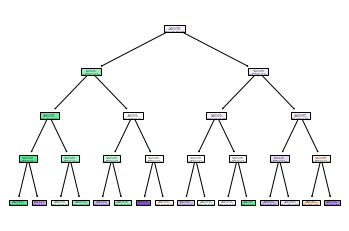

In [28]:
from sklearn import tree
tree.plot_tree(tree_model, max_depth=4, filled=True)

In [35]:
print(metrics.accuracy_score(trny, tree_pred_trn))
print(metrics.accuracy_score(tsty, tree_pred_tst))
confusion_matrix(tsty, tree_pred_tst)

0.5853575094081424
0.5478468899521531


array([[118,  70, 207],
       [ 35, 322,  60],
       [100,  95, 247]])

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=42)
rf_model.fit(trnx, trny)

rf_pred_trn = rf_model.predict(trnx)
rf_pred_tst = rf_model.predict(tstx)
print(metrics.accuracy_score(trny, rf_pred_trn))
print(metrics.accuracy_score(tsty, rf_pred_tst))
confusion_matrix(tsty, rf_pred_tst)


0.9945261717413616
0.5582137161084529


array([0.09587868, 0.10650663, 0.09186439, 0.15501089, 0.12568443,
       0.1834008 , 0.13641827, 0.10523591])

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=3, n_estimators=30, random_state=0)
gbm_model.fit(trnx, trny)

gbm_pred_trn = gbm_model.predict(trnx)
gbm_pred_tst = gbm_model.predict(tstx)
print(metrics.accuracy_score(trny, gbm_pred_trn))
print(metrics.accuracy_score(tsty, gbm_pred_tst))
confusion_matrix(tsty, gbm_pred_tst)


0.6548067054396168
0.5534290271132376


array([[108,  59, 228],
       [ 25, 323,  69],
       [ 93,  86, 263]])

In [67]:
np.column_stack([np.column_stack([tree_model.feature_importances_, rf_model.feature_importances_]), gbm_model.feature_importances_])

array([[0.00852252, 0.09587868, 0.03707801],
       [0.        , 0.10650663, 0.02370111],
       [0.        , 0.09186439, 0.05086073],
       [0.04731712, 0.15501089, 0.11711662],
       [0.03649289, 0.12568443, 0.05020526],
       [0.65072744, 0.1834008 , 0.49568298],
       [0.06548157, 0.13641827, 0.06496653],
       [0.19145847, 0.10523591, 0.16038875]])